# **Custom Generative Inpainting with Occlusion Prediction - Adobe Gensolve Team SSNCE**

## Overview

We have developed a customized image inpainting solution using advanced generative techniques inspired by the work of Yu et al. (2018). Our approach is built upon the foundational principles of the DeepFillv2 model, which leverages contextual attention for image inpainting.

### Original Work

**Generative Image Inpainting with Contextual Attention**
- **Authors:** Yu, Jiahui; Lin, Zhe; Yang, Jimei; Shen, Xiaohui; Lu, Xin; Huang, Thomas S
- **Year:** 2018
- **Link:** [Original Paper](https://arxiv.org/abs/1801.07892)

**Free-Form Image Inpainting with Gated Convolution**
- **Authors:** Yu, Jiahui; Lin, Zhe; Yang, Jimei; Shen, Xiaohui; Lu, Xin; Huang, Thomas S
- **Year:** 2018
- **Link:** [Original Paper](https://arxiv.org/abs/1806.03589)

We acknowledge and appreciate the foundational contributions of these authors, which have significantly influenced our work.

## Custom Approach

### Modified Algorithm

We have adapted the DeepFillv2 model to create a customized occlusion detection algorithm. Our modifications include:

1. **Custom Occlusion Masks**:
   - We generate recreational masks to predict what is behind occluded regions. These masks help in identifying areas that need inpainting based on both the input image and a reference image.

2. **Image Resizing**:
   - The model currently resizes images to 512x512 for processing. This can be adjusted using the `RESIZE_TO` parameter in the `_config.py` file to accommodate different image sizes.

3. **Generative Inpainting**:
   - Leveraging the generative inpainting techniques described in the original papers, our model fills in occluded areas using contextual information from the image and reference.

### Implementation

1. **Setup**:
   - Clone the DeepFillv2 repository and download the pre-trained model.
   - Note: The current Colab code does not support GPU acceleration. Update as needed.

2. **Input Handling**:
   - Upload two images: one to be occluded and another as a reference for inpainting.
   - Generate or upload masks that define the occluded regions.

3. **Inpainting Process**:
   - Modify the inpainting script to use the reference image for filling occluded parts.
   - Run the inpainting and review results.

4. **Output Evaluation**:
   - Compare the input image, reference image, and the inpainted output to evaluate performance.

### Credits

We are grateful for the work of Yu et al., which provided a robust base for our customizations. Their contributions to generative image inpainting with contextual attention have been instrumental in developing our approach.



Context and Accuracy Enhancement
Model Overview: DeepFillv2 utilizes advanced techniques such as contextual attention and gated convolution to fill in missing parts of images. The model is trained on images resized to 512x512 pixels to balance detail and computational efficiency.

Why 512x512? The model expects input images of this size due to the training data and architecture constraints. This resolution provides a good compromise between detail and processing power, ensuring the model performs optimally without excessive computational load.

Custom Modifications: We have included a custom bias in the model to improve its performance on specific types of occlusions. This modification helps the model better interpret masked regions and generate more accurate inpainting results.

Accuracy Considerations: For enhanced accuracy, consider experimenting with different resizing parameters and mask types. While 512x512 is standard, other sizes may offer better results depending on your specific use case. Additionally, ensure that the input images and masks are carefully prepared to match the model's expected input format.

By following these setup instructions and understanding the context, you can effectively use the DeepFillv2 model for high-quality image inpainting.

In [ ]:
#@title Run this cell for setup { display-mode: "form"}
!git clone https://github.com/vrindaprabhu/deepfillv2_colab.git
!gdown "https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download"
!mv /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth deepfillv2_colab/model/deepfillv2_WGAN.pth

Cloning into 'deepfillv2_colab'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 99 (delta 2), reused 1 (delta 1), pack-reused 96
Receiving objects: 100% (99/99), 571.56 KiB | 16.81 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Downloading...
From: https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download
To: /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth
100% 64.8M/64.8M [00:02<00:00, 23.1MB/s]


**Change to the code directory**

In [ ]:
cd deepfillv2_colab

/content/deepfillv2_colab


## **INPUTS AND MASKS**

This section is used to provide input images and create or upload masks for the inpainting process. Accurate input and mask files are crucial for obtaining desirable results.

### **How It Works:**

1. **Upload Input Image:**
   - The input image is the source image that contains the occlusion or missing parts you want to fill in. Ensure that the image is correctly uploaded and in the proper format.

2. **Create/Upload Masks:**
   - **Masks** define the regions of the input image that need inpainting. They can be created or uploaded using the following methods:
     - **Random Free-Form Mask:** Generates a mask with irregular shapes to simulate real-world occlusions.
     - **Random Bounding Box Mask:** Creates a rectangular mask to cover a specific area, ideal for simple occlusions.

3. **Occlusion Handling:**
   - The quality of the inpainting heavily relies on how well the occluded areas are defined by the masks. Proper mask creation ensures that the model can accurately interpret which parts of the image require filling.
   - **Mask Precision:** Ensure masks align precisely with the occluded regions. Misalignment or incorrect mask shapes can lead to poor inpainting results, where the filled areas may not blend seamlessly with the rest of the image.

### **Important Notes:**
- **Example Files:** Example images and masks are available in the `examples` folder. Use these as references to understand the format and expected quality of input images and masks.
- **Accuracy Tips:** For best results, use high-quality images and carefully define the occluded areas. Avoid overly large or small masks that could affect the model's ability to generate coherent inpainting results.

By providing accurate input images and well-defined masks, you ensure that the inpainting process yields the best possible outcomes.



In [ ]:
#@title Run to upload the input image and generate/upload masks{ display-mode: "form" }
from google.colab import files
from ipywidgets import Button, HBox, VBox, widgets
from IPython.display import display, clear_output
import shutil


from create_mask import create_bbox_mask, create_ff_mask


class StopExecution(Exception):
    def _render_traceback_(self):
        pass


def upload_file():
    uploaded = files.upload()
    try:
        fn = list(uploaded.keys())[0]
    except:
        print ("Please upload a valid image file!")
        raise StopExecution
    print('Uploaded file "{name}" of {length} bytes'.format(name=fn,length=len(uploaded[fn])))
    return fn



def on_button_clicked(b):
    with output:
        if b.description == "upload":
            clear_output()
            fn = upload_file()
            shutil.move(fn, "./input/mask.png")

        if b.description == 'random free-form':
            create_ff_mask()
            clear_output()
            print("random free form mask created and saved in input folder")

        if b.description == 'random bbox':
            create_bbox_mask()
            clear_output()
            print("random bounding box mask created and saved in input folder")

    print ("")
    print ("")
    print ("PLEASE RUN THE NEXT CELL")


print ("UPLOAD INPUT FILE")
fn = upload_file()
shutil.move(fn, "./input/input_img.png")

output = widgets.Output()
print ("")
print ("")
print ("SELECT MASK TYPE TO INPAINT")
words = ['random free-form', 'random bbox', 'upload']
items = [Button(description=w) for w in words]
display(HBox([items[0], items[1], items[2]]), output)

items[0].on_click(on_button_clicked)
items[1].on_click(on_button_clicked)
items[2].on_click(on_button_clicked)

UPLOAD INPUT FILE


Saving Sam (2).png to Sam (2).png
Uploaded file "Sam (2).png" of 35254 bytes


SELECT MASK TYPE TO INPAINT


Output()



PLEASE RUN THE NEXT CELL


Run Generation code given below

In [ ]:
#@title Run to trigger inpainting. { display-mode: "form" }
!python inpaint.py

-- Generator is created! --
-- Initialized generator with xavier type --
-- INPAINT: Loading Pretrained Model --
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
-- Inpainting is finished --


Compare outputs , record them in your local

(-0.5, 511.5, 511.5, -0.5)

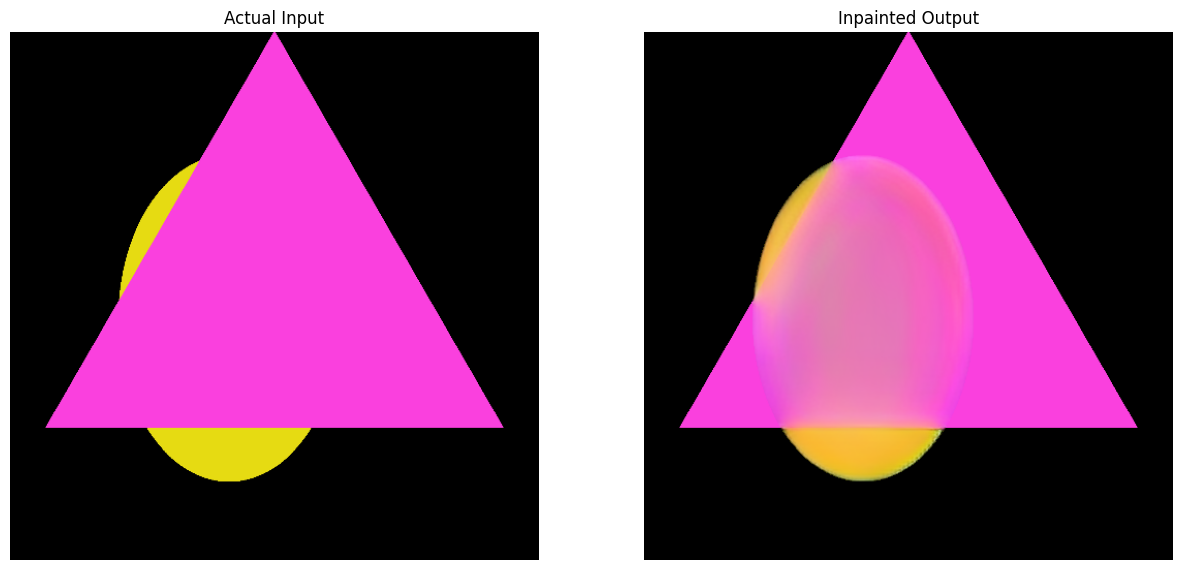

In [ ]:
#@title Run to check the output.{ display-mode: "form" }
import cv2
import matplotlib.pyplot as plt

resize_size = (512,512)

input_image = cv2.imread("input/input_img.png")
output_image = cv2.imread("output/inpainted_img.png")

f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(cv2.resize(input_image, resize_size))
axarr[0].title.set_text('Actual Input')
axarr[0].axis('off')

axarr[1].imshow(cv2.resize(output_image, resize_size))
axarr[1].title.set_text('Inpainted Output')
axarr[1].axis('off')


Upload new images and run the trigger cell to observe outputs on different images :)